# Analysis

# Analysis
Snapshot of covid19 cases and deaths in the US during the peak period from January 2020 to December 2020.
When looking at total deaths per state, New York is ranked number one, almost double the second highest state New Jersey.
California and Texas are third and fouth on the list.  These states have large population, all four states are among the most populous states in the United States.  California was the most populous state, followed by Texas, Florida, and then New York. New Jersey was also relatively densely populated. 

When looking at the average deaths per cases across the states.  I've notice the top five are New Jersey, New York, Massachusetts, District of Columbia, and Connecticut.  Interestingly, these states are located in the northeastern part of the United States, with New Jersey, New York, and Connecticut forming part of the Northeastern United States, while Massachusetts and the District of Columbia are often associated with the region due to their proximity and cultural connections.  In addition, they are some of the most densely populated areas in the United States, with large urban centers such as New York City, Boston (in Massachusetts), and Washington D.C.

I also ran a scatter plot with a linear regression line to check for correlation between cases and deaths reported, since not all deaths are covid related.  I also commputed the r-value to see if there is a strong correlation between cases and deaths.  The r-value is: 0.7702188299909039 which is greater than 0.05 indicated that there is a correlation between cases and deaths.

To further understand what happended during the peak of covid19 in 2020 I also ran a OLS regression analysis, mainly focus on the coefficient and p-value.  The purpose of Ordinary Least Squares (OLS) regression analysis is to model the relationship between a dependent variable (covid deaths) and one or more independent variables by fitting a linear equation to the observed data. It is one of the most commonly used techniques in statistical analysis and is widely used in various fields, including economics, social sciences, finance, and data science.

First I want to see if there is a relationship between health care spending, Hospitals, ICU-bed, people over the age of 55+ and physicians. The R-squared value is 0.810, indicating that approximately 81.0% of the variance in the dependent variable "Deaths" can be explained by the five independent variables collectively. The adjusted R-squared (Adj. R-squared) is 0.789, which takes into account the number of independent variables and the sample size. This value is slightly lower than the R-squared, as it penalizes for additional variables in the model. In conclusion, based on the provided regression analysis results, the only variable with a statistically significant effect on the number of "Deaths" is "Physicians." The other variables ("Spending," "Hospitals," "ICU_bed," and "Age55") do not have statistically significant effects on the number of "Deaths" at the chosen significance level.  There are two main explations for why the increase of "Physicians" also increased "Deaths".  The first explanation is Confounding Factors: There may be other variables not included in the model that could be influencing both the number of physicians and the number of deaths. For example, regions with higher population densities may have more physicians and also experience more deaths due to higher exposure and transmission of diseases.  Reverse Causality: The relationship might be the other way around, meaning that higher numbers of deaths could lead to an increased demand for more physicians to manage healthcare needs.

Lastly, I want to see if there is a relationship between deaths and tested, infected cases, flu deaths, respiratory deaths and smoking rates. Since not all deaths are covid19 alone, therefore I included flu and respiratory deaths. In summary, the regression model explains a substantial portion of the variance in "Deaths" (R-squared: 0.821), and the overall model fit is statistically significant. The variables "Tested" and "Infected" have statistically significant relationships with the number of "Deaths." However, the coefficients for "Flu_deaths," "Respiratory_Deaths," and "smoking_rate" are not statistically significant at the chosen significance level.

Summary:  COVID-19 is a complex and multifaceted disease that can be influenced by several factors. The analysis highlighted that health care spending, hospitals, ICU-bed availability, people over the age of 55+, and physicians are potential contributors to the number of COVID-19 deaths. The study found that the number of physicians had a statistically significant effect on the number of deaths, suggesting their crucial role in managing healthcare needs during the pandemic. However, other variables like health care spending, hospitals, ICU-bed availability, and age group did not show significant effects. This underscores the intricate nature of the pandemic and the importance of considering various factors when analyzing and responding to COVID-19. It's crucial to continue conducting research and data analysis to better understand the dynamics of the virus and its impact on different populations to develop effective strategies for prevention, treatment, and response measures.


In [63]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas
#Turn off warning messages
import warnings
warnings.filterwarnings("ignore")
import os
from pathlib import Path

In [36]:


#data_df = Path("Resources/us_states_covid19_daily.csv")

data_df = pd.read_csv("Resources/us_states_covid19_daily.csv")
data_df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [37]:
#data_df.info()


In [38]:
data_df.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

In [39]:
daily_data = pd.read_csv("Resources/us_covid19_daily.csv")

daily_data

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20201206,56,14534035,161986294,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,20201205,56,14357264,160813704,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,...,202429337,2020-12-05T24:00:00Z,0,0,2445,3316,1526995,211073,2169756,6249216c5f097c94ce33a811dab011a483a42404
2,20201204,56,14146191,159286709,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,...,200259581,2020-12-04T24:00:00Z,0,0,2563,4652,1260657,224831,1854869,ae30ea088584335ba4d57ee927f8dbda6add74db
3,20201203,56,13921360,158026052,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,...,198404712,2020-12-03T24:00:00Z,0,0,2706,5331,1238465,210204,1828230,0f253d185ecb336cdd18a4c61996eda1b7eef13b
4,20201202,56,13711156,156787587,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,...,196576482,2020-12-02T24:00:00Z,0,0,2733,5028,982032,195796,1459202,477c17b6302d0485195e77ecf8270a974f7a3c82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,20200126,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-26T24:00:00Z,0,0,0,0,0,0,0,69c67c81e64d10a5270497fc5336779c06fb812b
316,20200125,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-25T24:00:00Z,0,0,0,0,0,0,0,9ea5731f5b0a79617b994d6842eecfdbeb1dde35
317,20200124,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-24T24:00:00Z,0,0,0,0,0,0,0,287531342bc8d5f2650b0cc12ebcca3807a64b7b
318,20200123,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-23T24:00:00Z,0,0,0,0,0,0,1,e0563aac8e1bc7b8b8059c52831b97179ff6f981


In [75]:
counties_data = pd.read_csv("Resources/us_counties_covid19_daily.csv")
counties_data 
# counties_data["deaths"] = counties_data["deaths"].map("{:,.2f}".format)
# counties_data

#this was for debugging 
counties_Data_state = counties_data[counties_data['state']== 'New York']
death_sum_state = counties_Data_state.groupby('state')['deaths'].sum().reset_index()
death_sum_state
counties_data


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [41]:

# merging states and daily together 

# merge_data = pd.merge(data_df,daily_data,on="date")
# merge_data

# I think i did something wrong here if you look at deathIncrease_y the value are the same 
# so merging them is not a good idea.  



In [42]:
# clean_data = merge_data.drop(['totalTestResultsSource', 'lastModified', 'hash_y'], axis=1)
# clean_data


In [43]:

counties_data.info()
counties_clean = counties_data.fillna(0)

counties_clean['cases'] = counties_clean['cases'].astype(int)
counties_clean['deaths'] = counties_clean['deaths'].astype(int)
print(counties_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB
              date      county       state     fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0      1       0
1       2020-01-22   Snohomish  Washington  53061.0      1       0
2       2020-01-23   Snohomish  Washington  53061.0      1       0
3       2020-01-24        Cook    Illinois  17031.0      1       0
4       2020-01-24   Snohomish  Washington  53061.0      1       0
...            ...         ...         ...      ...    ...     ...
800432  2020-12-05  Sweetwater     Wyoming  56037.0   

In [44]:
# clean_data = clean_data.fillna(0)
# clean_data


In [45]:
death_sum = counties_clean.groupby('state')['deaths'].sum().reset_index()
death_avg = counties_clean.groupby('state')['deaths'].mean().reset_index()

case_avg = counties_clean.groupby('state')['cases'].mean().reset_index()
case_sum = counties_clean.groupby('state')['cases'].sum().reset_index()
#hospitalized = data_df.groupby('state')['hospitalizedCumulative'].sum().reset_index()

#hospitalizedIncrease = data_df.groupby('state')['hospitalizedIncrease'].sum().reset_index()

state_avg = pd.merge(death_avg,case_avg, on="state")
state_deaths_cases_avg = pd.DataFrame(state_avg)
state_deaths_cases_avg_sort = state_deaths_cases_avg.sort_values("deaths")
#df = pd.merge(hospitalized,hospitalizedIncrease, on="state")

deaths_cases_sum = pd.merge(death_sum,case_sum, on="state")
# feel free to explore before we start graphing.
total_death_cases = pd.DataFrame(deaths_cases_sum)
total_death_sort = total_death_cases.sort_values("deaths", ascending = False)
total_death_sort.head()
#counties_data.describe()


    
## top five state total death

,state,deaths,cases
33,New York,7386720,104506668
31,New Jersey,3345732,46321719
4,California,2479213,127488272
46,Texas,2261900,119483867
9,Florida,2101392,107316623


In [46]:
total_death_sort.tail()
# last five state total death

,state,deaths,cases
54,Wyoming,11733,1527256
1,Alaska,8638,1747498
11,Guam,7319,657603
49,Virgin Islands,2905,167784
36,Northern Mariana Islands,492,12485


In [47]:
# death_sum = counties_clean.groupby('state')['deaths'].sum().reset_index
# death_sum

In [48]:
top_avg_death = state_avg.sort_values("deaths", ascending = False)
top_avg_death.head()
state_deaths_cases_avg =state_deaths_cases_avg.sort_values("deaths", ascending = False)
state_deaths_cases_avg.head()
# top average death rate base on cases

,state,deaths,cases
31,New Jersey,568.132450,7865.803872
33,New York,482.792157,6830.501176
22,Massachusetts,473.491120,7211.012087
8,District of Columbia,464.525547,10823.456204
6,Connecticut,410.430737,5491.523789


In [49]:
state_deaths_cases_avg.tail()

,state,deaths,cases
49,Virgin Islands,3.366165,194.419467
27,Montana,3.231878,268.692362
54,Wyoming,2.035919,265.010585
1,Alaska,1.451033,293.549135
36,Northern Mariana Islands,1.128440,28.635321


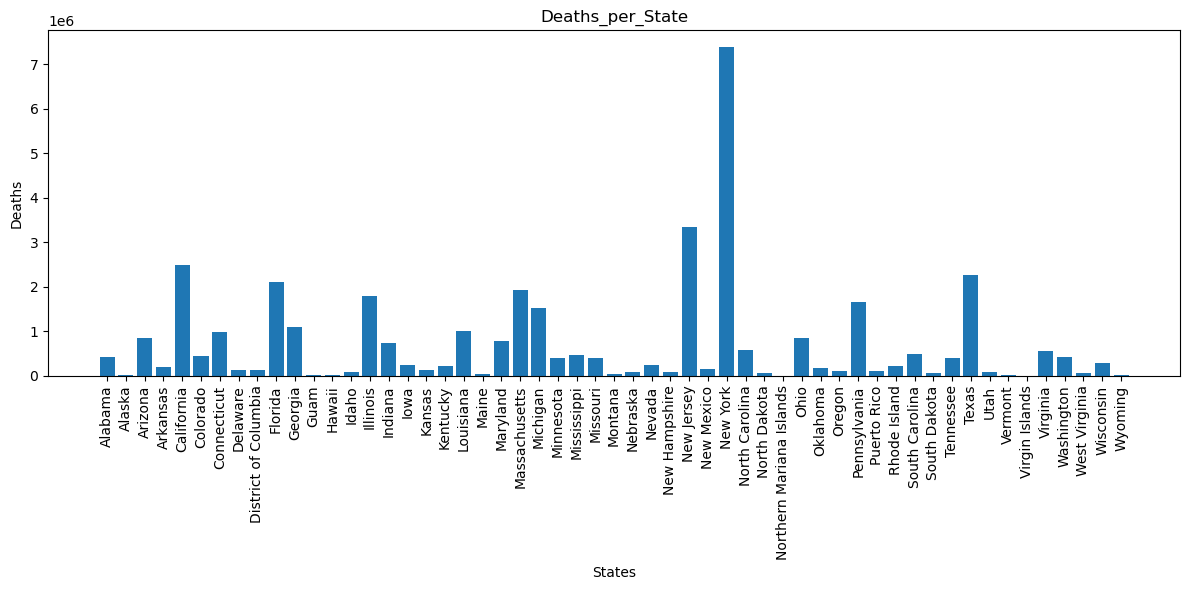

In [65]:
plt.figure(figsize=(12, 6)) 
plt.bar(total_death_cases['state'], total_death_cases['deaths'])
plt.xlabel('States')
plt.ylabel('Deaths')
plt.title('Deaths_per_State')
plt.xticks(rotation='vertical')
plt.tight_layout()  
plt.savefig('Deaths_per_state')  # Save the plot as 'sample_plot.png'

plt.show()


The r-value is: 0.7702188299909039


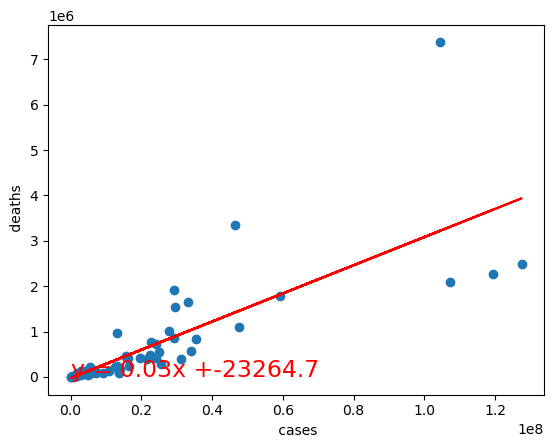

In [66]:
x_values = total_death_cases["cases"]
y_values= total_death_cases["deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"-r")
plt.xlabel(" cases")
plt.ylabel(" deaths")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is: {rvalue}")

output_folder = "output"

output_file_path = os.path.join(output_folder, 'sample_plot.png')
plt.savefig(output_file_path)


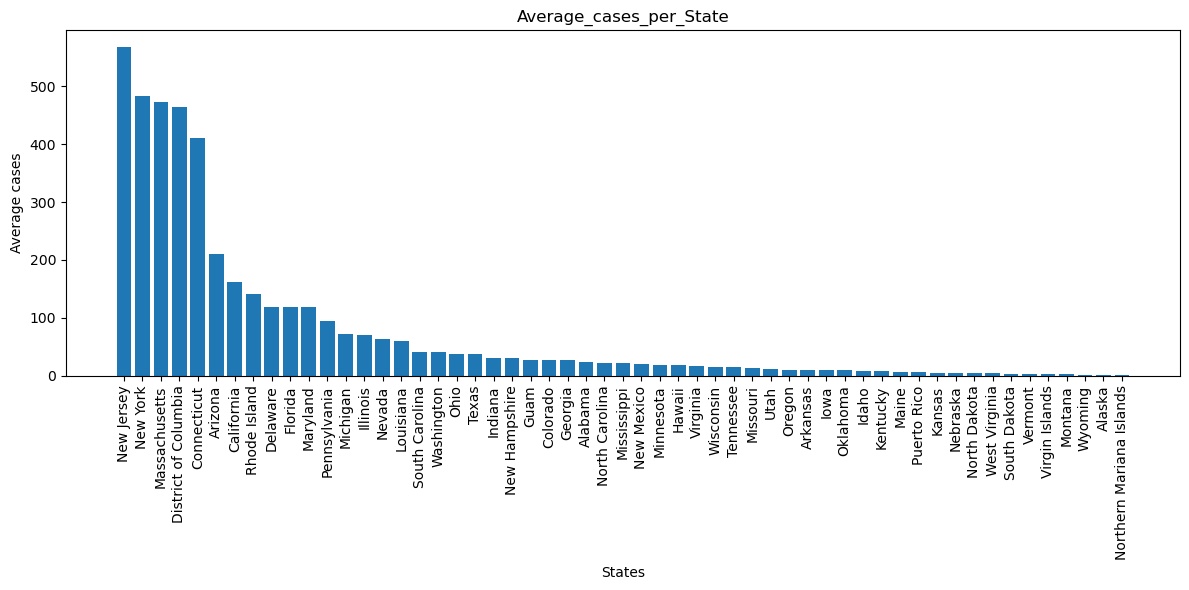

In [73]:
plt.figure(figsize=(12, 6)) 
plt.bar(state_deaths_cases_avg['state'], state_deaths_cases_avg['deaths'])
plt.xlabel('States')
plt.ylabel('Average cases')
plt.title('Average_cases_per_State')
plt.xticks(rotation='vertical')  
plt.tight_layout() 
plt.savefig('Average_cases_per_State')  # Save the plot as 'sample_plot.png'

plt.show()

#output_file_path = os.path.join(output_folder, 'Average_cases_per_State')


The r-value is: 0.8624335744217406


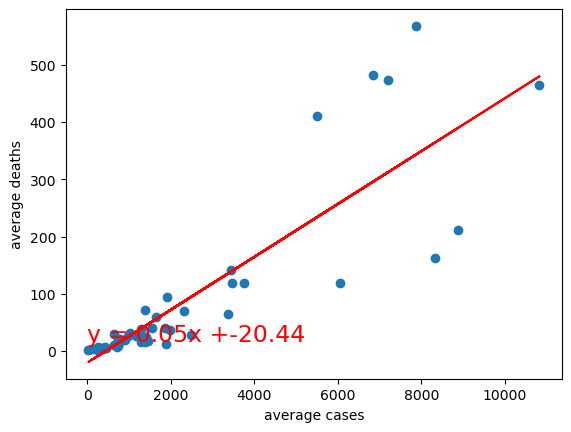

In [69]:
x_values = state_avg["cases"]
y_values= state_avg["deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"-r")
plt.xlabel("average cases")
plt.ylabel("average deaths")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is: {rvalue}")

output_file_path = os.path.join(output_folder, 'deaths_cases_avg')
plt.savefig(output_file_path)


In [54]:
covid19 = pd.read_csv("Resources/COVID19_state.csv")
df = pd.DataFrame(covid19)
df.rename(columns={'Health Spending': 'Spending','ICU Beds':'ICU_bed','Age 0-25':'Age0-25',
                  'Smoking Rate':'smoking_rate','Flu Deaths':'Flu_deaths',
                   'Respiratory Deaths':'Respiratory_Deaths','Age 55+':'Age55',
                  'Age 26-54':'Age26-54','Pop Density':'Pop_Density'}, inplace=True)
df
df.columns

Index(['State', 'Tested', 'Infected', 'Deaths', 'Population', 'Pop_Density',
       'Gini', 'ICU_bed', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
       'smoking_rate', 'Flu_deaths', 'Respiratory_Deaths', 'Physicians',
       'Hospitals', 'Spending', 'Pollution', 'Med-Large Airports',
       'Temperature', 'Urban', 'Age0-25', 'Age26-54', 'Age55',
       'School Closure Date'],
      dtype='object')

In [55]:
df.head()

,State,Tested,Infected,Deaths,Population,Pop_Density,Gini,ICU_bed,Income,GDP,...,Hospitals,Spending,Pollution,Med-Large Airports,Temperature,Urban,Age0-25,Age26-54,Age55,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [56]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [68]:
reg2 = 'Deaths~Tested+Infected+Flu_deaths+Respiratory_Deaths+smoking_rate'
reg2_output = smf.ols(reg2,df).fit()
print(reg2_output.summary())



                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     41.25
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.03e-15
Time:                        20:26:45   Log-Likelihood:                -468.50
No. Observations:                  51   AIC:                             949.0
Df Residuals:                      45   BIC:                             960.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            442.0662   2085

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


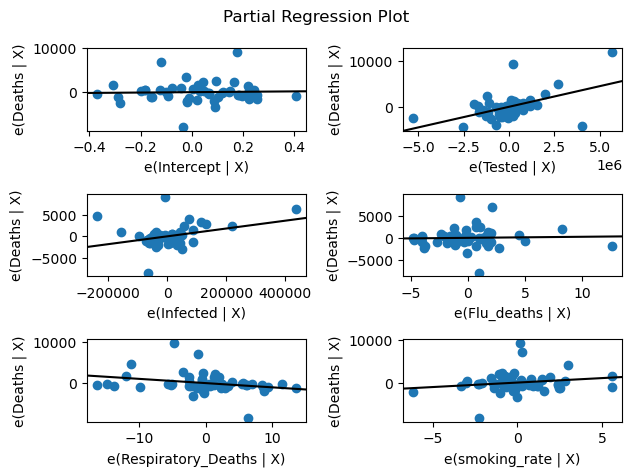

In [58]:
fig2 = sm.graphics.plot_partregress_grid(reg2_output)
fig2.tight_layout(pad=1.0)

In [59]:
reg1 = 'Deaths~Spending+Hospitals+ICU_bed+Age55+Physicians'

reg1_output = smf.ols(reg1,df).fit()
print(reg1_output.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     38.42
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           3.71e-15
Time:                        19:40:32   Log-Likelihood:                -469.98
No. Observations:                  51   AIC:                             952.0
Df Residuals:                      45   BIC:                             963.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1892.8780   4514.224     -0.419      0.6

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


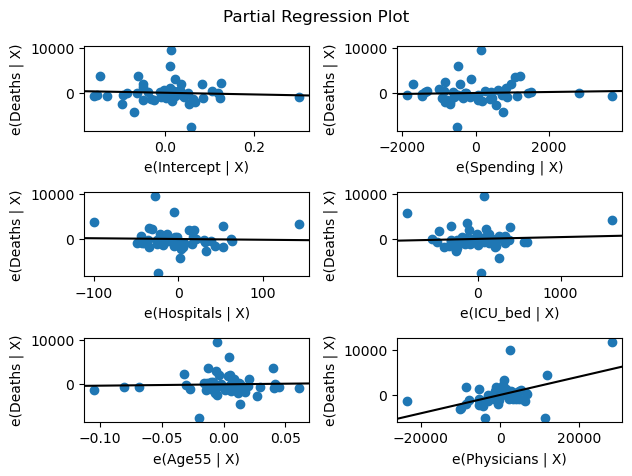

In [60]:
fig1 = sm.graphics.plot_partregress_grid(reg1_output)
fig1.tight_layout(pad=1.0)